In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import DataFunctions_greg as fc


pd.set_option('display.max_columns', None)

In [2]:
# sns.scatterplot(data=df_testeroo,x="Elevation",y="Horizontal_Distance_To_Fire_Points",hue="Cover_Type",palette='Spectral')
# sns.scatterplot(data=df,y="Elevation",x="Horizontal_Distance_To_Fire_Points")
# sns.scatterplot(data=df,y="Vertical_Distance_To_Hydrology",x="Horizontal_Distance_To_Hydrology")

In [3]:
df = pd.read_csv("covtype.csv")
# df.info()
# s = df['Cover_Type']
# s.replace([1, 3, 4,5,6,7], 0, inplace=True)
# s.replace(2, 1, inplace=True)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
df = fc.dummies_back_to_categorical(df,range(-41,-1),"Soil_Type")
df = fc.dummies_back_to_categorical(df,range(10,14),"Wilderness_Area")
df.head()

/Users/flatironschool/Flatiron DS/Forest_Tree_Types/DataFunctions_greg.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  i[categorical_column_name] = iteration


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2903,315,2,330,0,4734,214,237,161,4987,2,7,1
1,2906,45,1,371,6,4668,219,236,154,5007,2,7,1
2,2906,11,4,360,3,4696,216,232,153,4986,2,7,1
3,2906,0,3,330,3,4725,215,234,156,4966,2,7,1
4,2906,333,3,379,6,4658,212,235,161,4986,2,7,1


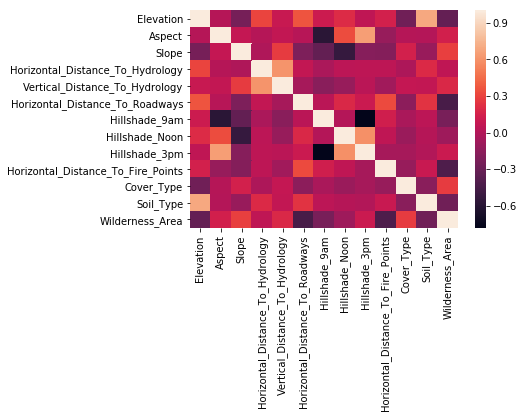

In [5]:
sns.heatmap(df.corr())

In [6]:
X = df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"])
y = df['Cover_Type']

X_scaled = MinMaxScaler().fit_transform(X)


# Run PCA 

In [7]:
pca=PCA()
pca_all = pca.fit_transform(X_scaled)
st.mean(sum(pca_all))

7.135183524749344e-11

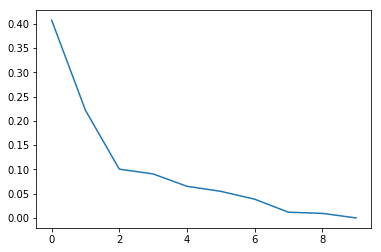

In [8]:
pca.explained_variance_ratio_
sns.lineplot(data=pca.explained_variance_ratio_)

In [9]:
for i in range(0,10):
    print(i, round(pca.explained_variance_ratio_[:i].sum(),3))
    if i>1:
        print("Change in pca:", round(pca.explained_variance_ratio_[:i].sum() - pca.explained_variance_ratio_[:(i-1)].sum(),3),"\n")
    
print(f"The first 4 eigenvectors explain {pca.explained_variance_ratio_[:2].sum()*100}% of the data.")

0 0.0
1 0.407
2 0.628
Change in pca: 0.222 

3 0.729
Change in pca: 0.1 

4 0.82
Change in pca: 0.091 

5 0.885
Change in pca: 0.065 

6 0.94
Change in pca: 0.055 

7 0.978
Change in pca: 0.039 

8 0.99
Change in pca: 0.012 

9 1.0
Change in pca: 0.01 

The first 4 eigenvectors explain 62.841834357291674% of the data.


In [10]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca_train = pca.fit_transform(X_train)
# st.mean(sum(pca_train))

# pca = PCA()
# pca_test = pca.fit_transform(X_test)
# st.mean(sum(pca_test))

In [11]:
display(pca_all)

array([[ 0.40168161,  0.49459446, -0.20917948, ...,  0.07299603,
        -0.01019648,  0.00843721],
       [-0.29322073,  0.50237797, -0.13566622, ...,  0.04571773,
        -0.01795688,  0.0108696 ],
       [-0.37814585,  0.49472857, -0.13396197, ...,  0.0359838 ,
        -0.03107039,  0.00644248],
       ...,
       [ 0.51896508, -0.41104629, -0.25143364, ...,  0.05615174,
         0.00777429, -0.00658412],
       [-0.36906088, -0.4006228 , -0.17086047, ...,  0.0319876 ,
         0.00372153, -0.00627712],
       [ 0.52824906, -0.39633297, -0.25582623, ...,  0.06614762,
         0.02435442, -0.00212218]])

In [12]:
pca_df = pd.DataFrame(pca_all[:, :4], index=df.index)
pca_df.head()

,0,1,2,3
0,0.401682,0.494594,-0.209179,0.195967
1,-0.293221,0.502378,-0.135666,0.158256
2,-0.378146,0.494729,-0.133962,0.144670
3,-0.400660,0.498421,-0.147365,0.129506
4,0.448774,0.486365,-0.182484,0.219746


In [13]:
pca_df.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5'}, inplace=True)

In [14]:
df_new = df.join(pca_df)
df_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area,c1,c2,c3,c4
0,2903,315,2,330,0,4734,214,237,161,4987,2,7,1,0.401682,0.494594,-0.209179,0.195967
1,2906,45,1,371,6,4668,219,236,154,5007,2,7,1,-0.293221,0.502378,-0.135666,0.158256
2,2906,11,4,360,3,4696,216,232,153,4986,2,7,1,-0.378146,0.494729,-0.133962,0.144670
3,2906,0,3,330,3,4725,215,234,156,4966,2,7,1,-0.400660,0.498421,-0.147365,0.129506
4,2906,333,3,379,6,4658,212,235,161,4986,2,7,1,0.448774,0.486365,-0.182484,0.219746


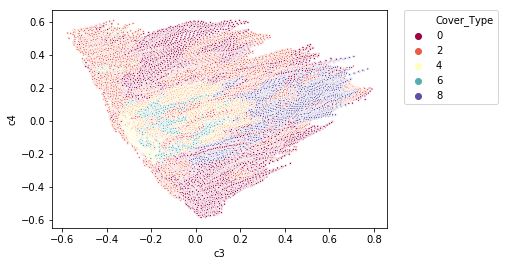

In [15]:
sns.scatterplot(data=df_new, x='c3',y='c4',hue="Cover_Type",palette='Spectral',s=5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
vects = pca.components_[:4]

In [17]:
one = pd.Series(vects[0], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
one.sort_values(ascending=False)

Aspect                                0.907848
Hillshade_3pm                         0.339235
Hillshade_Noon                        0.089750
Horizontal_Distance_To_Roadways       0.027876
Slope                                 0.020477
Vertical_Distance_To_Hydrology        0.019152
Horizontal_Distance_To_Hydrology      0.015892
Elevation                             0.010105
Horizontal_Distance_To_Fire_Points   -0.078609
Hillshade_9am                        -0.211140
dtype: float64

In [18]:
two = pd.Series(vects[1], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
two.sort_values(ascending=False)

Horizontal_Distance_To_Roadways       0.802187
Horizontal_Distance_To_Fire_Points    0.461141
Elevation                             0.295408
Horizontal_Distance_To_Hydrology      0.118642
Hillshade_Noon                        0.087455
Hillshade_3pm                         0.073693
Hillshade_9am                         0.044101
Vertical_Distance_To_Hydrology       -0.007829
Aspect                               -0.012103
Slope                                -0.165139
dtype: float64

In [19]:
three = pd.Series(vects[2], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
three.sort_values(ascending=False)

Horizontal_Distance_To_Hydrology      0.763371
Elevation                             0.397726
Vertical_Distance_To_Hydrology        0.270798
Slope                                 0.028440
Hillshade_3pm                         0.011675
Hillshade_Noon                        0.007308
Hillshade_9am                        -0.006632
Horizontal_Distance_To_Roadways      -0.009432
Aspect                               -0.067228
Horizontal_Distance_To_Fire_Points   -0.424377
dtype: float64

In [20]:
four = pd.Series(vects[3], index=df.drop(columns=['Cover_Type',"Wilderness_Area","Soil_Type"]).columns)
four.sort_values(ascending=False)

Horizontal_Distance_To_Fire_Points    0.768986
Horizontal_Distance_To_Hydrology      0.383391
Vertical_Distance_To_Hydrology        0.125526
Aspect                                0.075373
Slope                                 0.017406
Elevation                            -0.000435
Hillshade_9am                        -0.008180
Hillshade_3pm                        -0.009645
Hillshade_Noon                       -0.018297
Horizontal_Distance_To_Roadways      -0.489322
dtype: float64

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)